In [85]:
'''
ATSC 405: Numerical Methods in Meteorology, University of North Dakota
Code using Python3 and Cartopy to read in and plot WRF output data

written by: Aaron Scott, Fall 2021

'''
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
import warnings
import os
warnings.filterwarnings('ignore')
import numpy as np
from metpy.plots import USCOUNTIES
from metpy.plots import ctables
from matplotlib.colors import Normalize

In [100]:
##########################################################

'''

WRF output 


'''
#########################################################
path = './wrfgfsoutput/' #path to your data 
file = 'wrfout_d01_2016-08-04_00:00:00.nc' #pick a file to read in 
fpath = os.path.join(path,file)
nc_fid  = nc.Dataset(fpath,'r')
nc_vars = [var for var in nc_fid.variables]

#read in specified data 
#You can read in other data, explore the date with the nc_fid.variables method below 

wlats = nc_fid.variables['XLAT'][:]
wlons = nc_fid.variables['XLONG'][:]
u10m = nc_fid.variables['U10'][:]
v10m = nc_fid.variables['V10'][:]
T2m = nc_fid.variables['T2'][:]
Psfc = nc_fid.variables['PSFC'][:] #in Pa
Q2m = nc_fid.variables['Q2'][:]
ref = nc_fid.variables['REFL_10CM'][:]
sfctempF = (T2m-273.15)*(9/5)+32
#calculate 10m winds from U and V
wind10m = (u10m**2 + v10m**2)**(0.5)




In [110]:
#uncomment below to explore the data 
#print(nc_fid.variables)
#print(nc_fid.variables.keys())

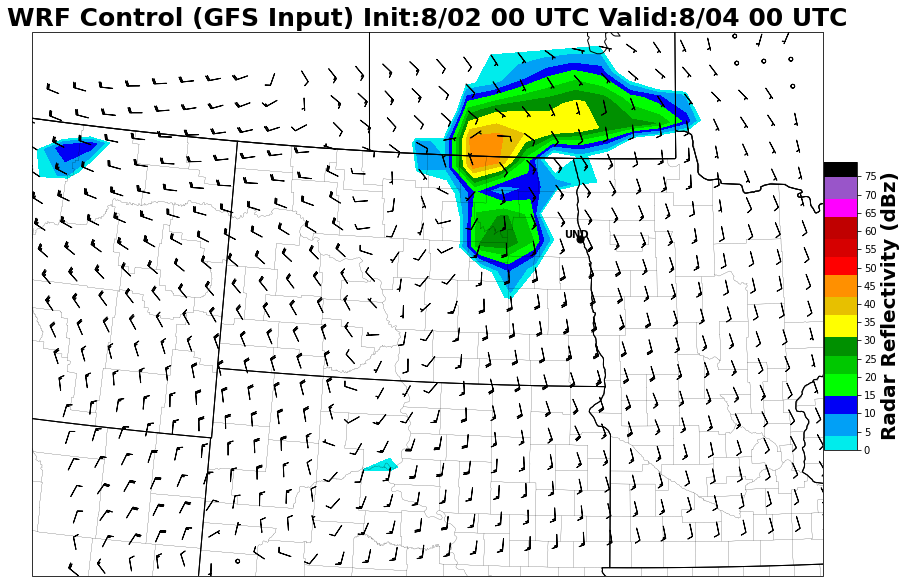

In [111]:
##########################################################

'''
Plotting


'''
#########################################################
degree = u"\N{DEGREE SIGN}" #handy degree symbol to use for labels 
cmap = ctables.registry.get_colortable('NWSReflectivity') #color map for radar, will need to have imported from metpy
#create the figure 
fig = plt.figure(figsize=((15,10))) #x,y size. Can change if you want figure a different size or shape.
time=0 #if had a file with multiple times in it, would want to indicate which time index here. Keep 0 for this case.
data_crs =ccrs.PlateCarree() #coordinate system of data (lat/lon)
projection=ccrs.LambertConformal() #transform to this projection for plotting

#this is the OOP way of plotting in python
#everything you want to do to the plot will be referenced with ax1 (could name it anything bu ax# is convention)
ax1=fig.add_subplot(1,1,1,projection=projection) 
#can specifiy the area of the map to plot, if not, it will make plot that shows all of the data, but usually will show edges with no data
#ax1.set_extent([-104.3,-95.5,45.5,49.5],ccrs.PlateCarree()) #left lon, #right lon, #bottom lat, #top lat
sp=1 #this is to control spacing of the wind barbs - in high res runs (not this data), wind barbs get too packed and hard to read

cs=ax1.contourf(wlons[0,:,:],wlats[0,:,:],ref[time,5,:,:],np.arange(0,80,1),cmap=cmap,norm=Normalize(-1, 80),transform=data_crs) 
cs2=ax1.barbs(wlons[0,::sp, ::sp],wlats[0,::sp, ::sp],u10m[time,::sp,::sp]*1.94384,v10m[time,::sp,::sp]*1.94384,length=5,transform=data_crs)
# Use contour() instead of contourf() if you want to plot countours of something without the color fill

ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(USCOUNTIES.with_scale('5m'),linewidth=0.1) #will need import from metpy at top of code
ax1.set_aspect(1)
ax1.set_title('%s' %'WRF Control (GFS Input) Init:8/02 00 UTC Valid:8/04 00 UTC', size=25,fontweight='bold')

ax1.plot(-97.0768,47.9229,color='black',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=7) #und location
ax1.text(-97.4, 47.93,'UND',color='black',transform=ccrs.PlateCarree(),fontsize=10,fontweight='bold') #und label

cbar_ticks_ls = [val for val in range(0,80,5)] #list comprehension that will create list of ticks for colorbar
cbar_ax = fig.add_axes([0.88,0.3,0.03,0.4]) #left,bottom,w,h can change location of colorbar here 
cbar=fig.colorbar(cs,ticks=cbar_ticks_ls,cax=cbar_ax)
cbar.set_label("Radar Reflectivity (dBz)",size=20,fontweight='bold')  

plt.savefig('./WRF_ref.png',dpi=300)